In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import oneshot as sm
import rfm, skipRFM, deepSkip, localSkip_2_2, localDeepSkip_8_1, localDeepSkip_2_2, localSkip_8_1
# import parallel_euler as arch1
import torch
from torch import nn
import ks, l63, l96, ks_torch, ks0, ks1
import config

dt = 0.1
tau = {'error_threshold' : 0.25, 'dt': dt, 'Lyapunov_time': 1/0.094}

In [2]:
ut.waterfall(uu[:, 400:-10], **tau)

NameError: name 'uu' is not defined

In [2]:
dns  = ks.KS(dt=0.25, tend=350)
dns.simulate()

/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
  self.vv[0] = v0
/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py:112: ComplexWarning: Casting complex values to real discards the imaginary part
  self.vv[self.ioutnum,:] = self.v


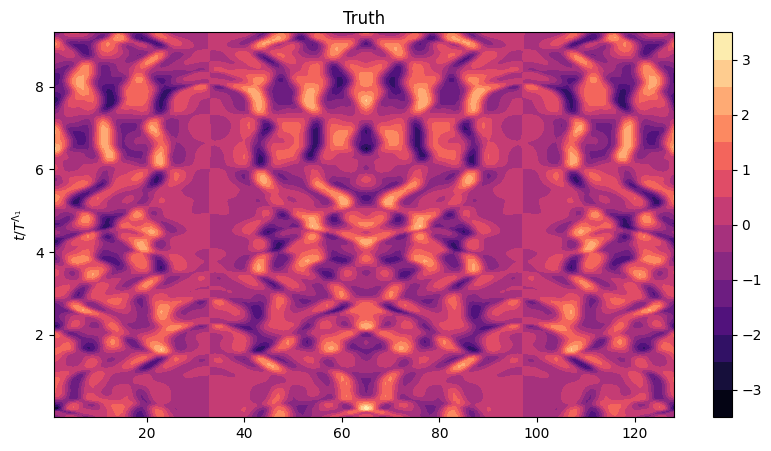

In [3]:
ut.waterfall(dns.uu.T[:, 400:-10], **tau)

In [78]:
p = 100001+40000
test = np.moveaxis(dns.uu[p:].reshape(100, -1, 128), 1, 2)
np.random.shuffle(test)

In [72]:
(2e5+100*1000)*0.25

75000.0

In [73]:
dns.uu.shape

(300001, 128)

In [2]:
1j*np.pi

NameError: name 'np' is not defined

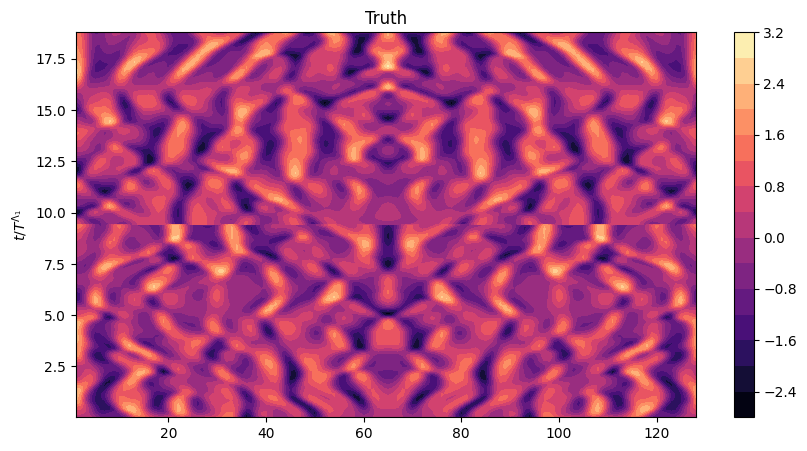

In [83]:
ut.waterfall(test[50][:, :800], **tau)

In [2]:
uu0 = ks0.KS32(tmax=150).uu
dns = ks.KS(tend=150)
dns.simulate()

Time taken by __init__ is 0.0533 seconds


/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
  self.vv[0] = v0
/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py:114: ComplexWarning: Casting complex values to real discards the imaginary part
  self.vv[self.ioutnum, :] = self.v


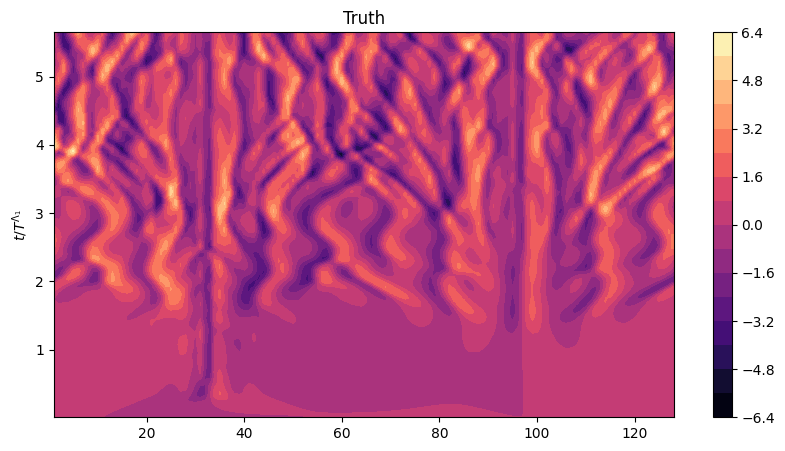

In [3]:
ut.waterfall(uu0-dns.uu, **tau)

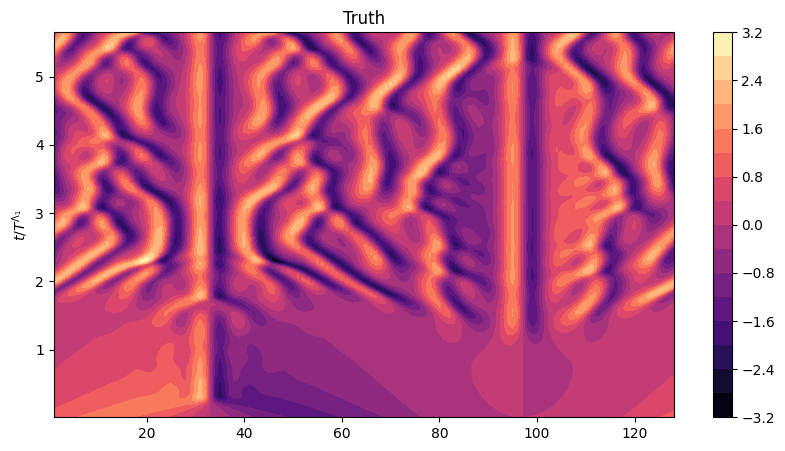

In [7]:
ut.waterfall(dns.uu, **tau)

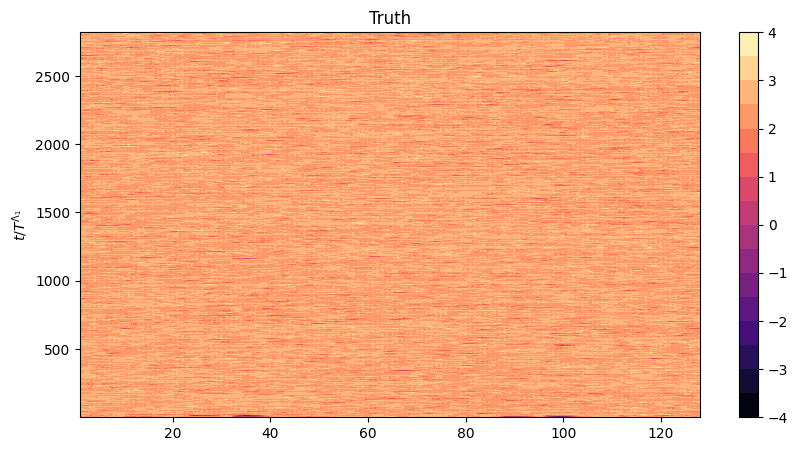

In [23]:
dns = ks.KS(tend=75000)
dns.simulate()
ut.waterfall(dns.uu, **tau)

In [27]:
uu0 = ks0.KS32(tmax=15000).uu

Time taken by __init__ is 2.0895 seconds


In [2]:
train, test = ks.gen_data(test_num=100, save_folder='../data/KS-trajectories')

/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
  self.vv[0] = v0
/Users/pman0581/Documents/GitHub/DeepRFM/modules/ks.py:114: ComplexWarning: Casting complex values to real discards the imaginary part
  self.vv[self.ioutnum, :] = self.v


Time taken by gen_data is 24.5379 seconds


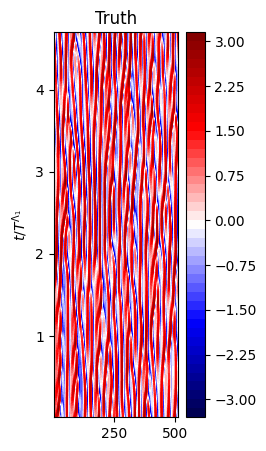

In [8]:
ut.waterfall(train[:, 2000:2500], cmap='seismic', levels=50, width=2, **tau)